# Feature Selection

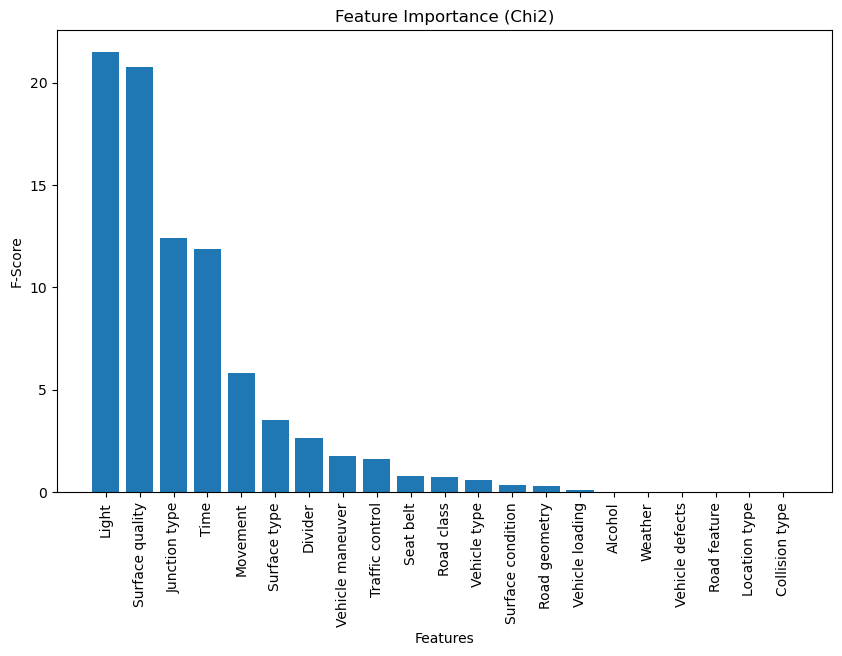

Feature Importance (Chi2):
              Feature    F-Score
7               Light  21.489933
11    Surface quality  20.766415
1       Junction type  12.433101
0                Time  11.873297
4            Movement   5.805187
10       Surface type   3.522905
5             Divider   2.658545
16   Vehicle maneuver   1.753983
2     Traffic control   1.621656
20          Seat belt   0.799094
12         Road class   0.754815
15       Vehicle type   0.620824
9   Surface condition   0.365875
8       Road geometry   0.288291
17    Vehicle loading   0.093836


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

accident_data = pd.read_csv(r"D:\Accident Prediction\Publication 2023\Preparing the raw dataset\final_accident_data.csv")

# Data Encoding
X = accident_data.drop(columns="Accident severity")  # Set the independent variables
y = accident_data["Accident severity"]  # Set the target variable

# Encoding categorical features using OrdinalEncoder
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Split the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform chi2 feature selection and get the f-scores
f_scores, p_values = chi2(X_train, y_train)

# Create a DataFrame to store the feature names and corresponding f-scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})

# Sort the DataFrame by f-scores in descending order
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

# Plotting the feature scores in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Feature'], feature_scores['F-Score'])
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('Feature Importance (Chi2)')
plt.xticks(rotation=90)
plt.show()

# Print the feature scores in descending order
print("Feature Importance (Chi2):")
print(feature_scores.head(15)) # printing important features

In [4]:
feature_scores.iloc[15:, 0] # features that are not important

19            Alcohol
6             Weather
18    Vehicle defects
13       Road feature
14      Location type
3      Collision type
Name: Feature, dtype: object